In [1]:
%config Completer.use_jedi = False

In [2]:
!module load StdEnv/2020 cuda cudnn


Due to MODULEPATH changes, the following have been reloaded:
  1) libfabric/1.10.1     2) openmpi/4.0.3     3) ucx/1.8.0



In [3]:
import pickle
with open("../preproccessed_data.pickle", 'rb') as f:
    data = pickle.load(f)
   
train = data['train']
train_target = data['train_target']
validation = data['validation']
validation_target = data['validation_target']
test = data['test']
test_target = data['test_target']

In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
from tensorflow.keras.models import load_model

In [7]:
model = load_model("../my_hp_results/best_models/best_conv1dse.pickle")

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1500, 1)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 1500, 128)    1280        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 1500, 128)   512         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 global_average_pooling1d (Glob  (None, 128)         0           ['batch_normalization[0][0]']

In [9]:
pred = model.predict(validation)

250/250 [==============================] - 433s 2s/step


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [11]:
import numpy as np
preds = np.argmax(pred, axis=1)

In [12]:
accuracy_score(validation_target, preds)

0.7135

In [13]:
# (fold, Hopf, transcritical, Null) 0 1 2 3 classes

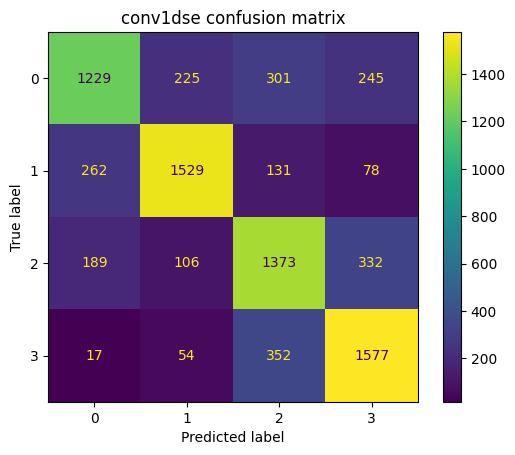

In [14]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix(y_pred=preds, y_true=validation_target))
disp.plot()
plt.title("conv1dse confusion matrix")
plt.show()

In [15]:
val_errors = validation[preds != validation_target]
val_true = validation[preds == validation_target]

In [16]:
def non_zero_count(seq):
    return sum(seq!=0)

In [17]:
non_zero_count_val_errors = [non_zero_count(val_error) for val_error in val_errors]
non_zero_count_val_true = [non_zero_count(val_t) for val_t in val_true]

non_zero_count_val_errors = np.squeeze(np.array(non_zero_count_val_errors))
non_zero_count_val_true = np.squeeze(np.array(non_zero_count_val_true))

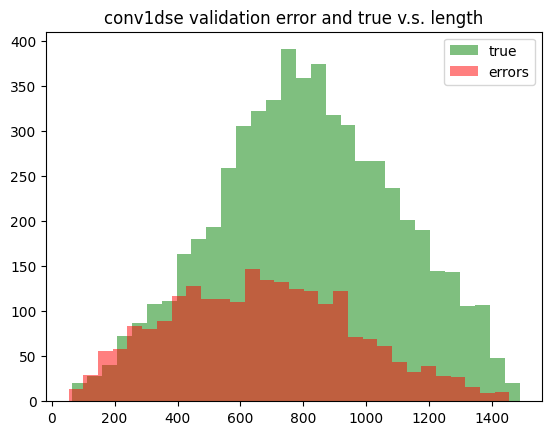

In [18]:
plt.hist(non_zero_count_val_true, bins=30, alpha=0.5, label='true', color='g')
plt.hist(non_zero_count_val_errors, bins=30, alpha=0.5, label='errors', color='r')
plt.legend(loc='upper right')
plt.title("conv1dse validation error and true v.s. length")
plt.show()

Text(0.5, 1.0, 'true: hopf, pred: hopf')

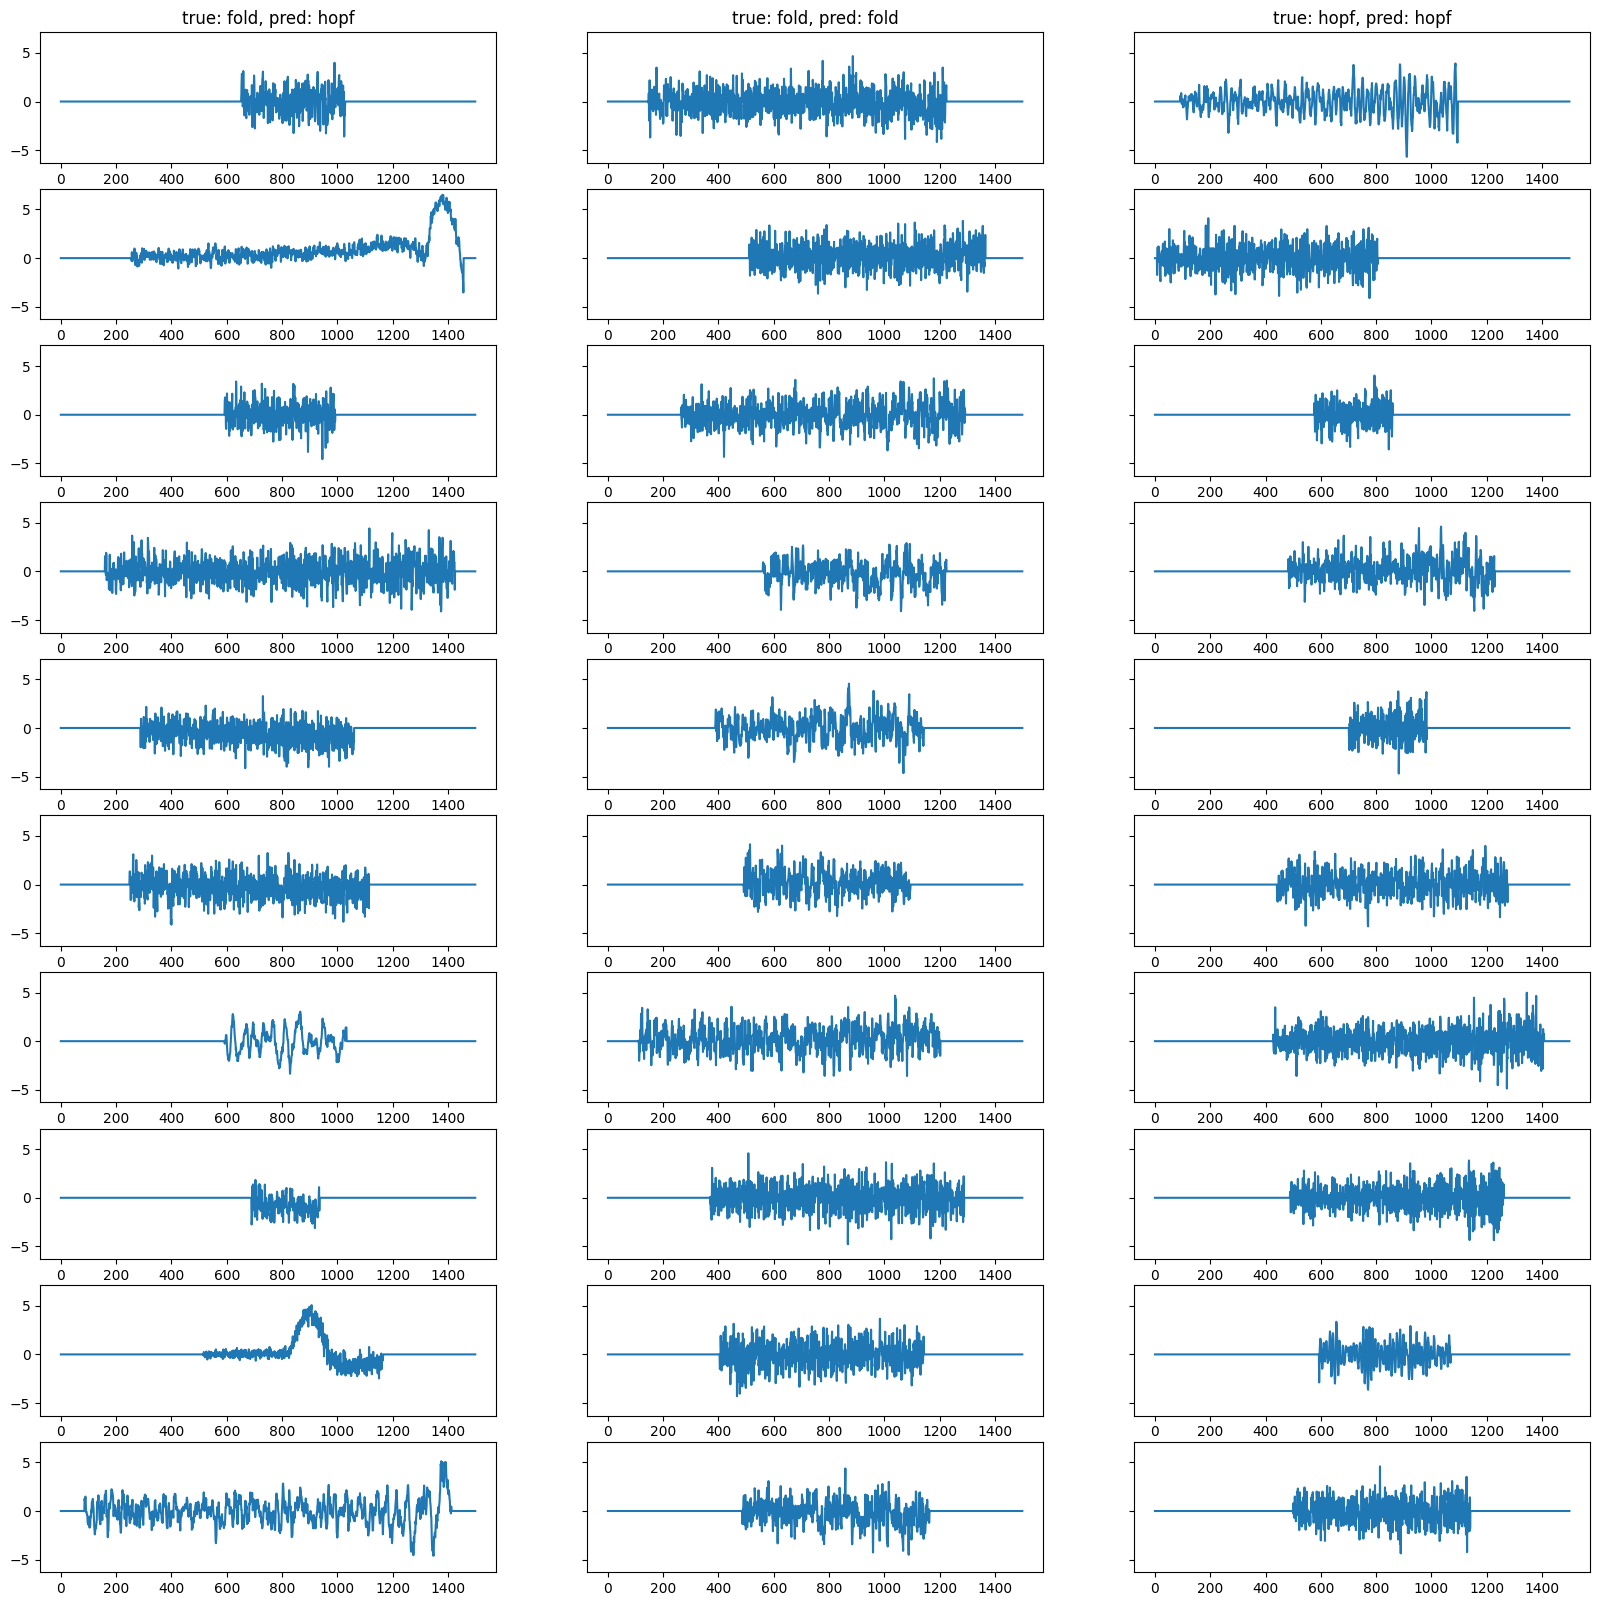

In [39]:
fig, ax = plt.subplots(10, 3, sharey=True, figsize=(20,20))
error_0to1 = validation[((validation_target==0) & (preds==1))]
for i in range(10):
    ax[i,0].plot(range(1500),error_0to1[i])
ax[0,0].set_title("true: fold, pred: hopf")

true_0 = validation[((validation_target==0) & (preds==0))]
for i in range(10):
    ax[i,1].plot(range(1500),true_0[i])
ax[0,1].set_title("true: fold, pred: fold")


true_1 = validation[((validation_target==1) & (preds==1))]
for i in range(10):
    ax[i,2].plot(range(1500),true_1[i])
ax[0,2].set_title("true: hopf, pred: hopf")

    

In [28]:
import pandas
df_groups = pandas.read_csv('../../training_data/output_full/ts_{}/combined/groups.csv'.format(1500),
                            index_col='sequence_ID')

In [32]:
df_groups.head()

,dataset_ID
sequence_ID,
1,1
2,1
3,1
4,1
5,1


In [34]:
counter = 0
for idx, row in df_groups.iterrows():
    if row['dataset_ID'] == 2:
        counter+=1
    if counter == 71:
        break        

In [35]:
idx

3127

In [31]:
idx

1

In [22]:
np.where((validation_target==3) & (preds==2))

(array([  41,   43,   44,   45,   58,   62,   65,   71,   72,   74,   76,
         202,  203,  225,  229,  234,  367,  368,  372,  374,  375,  381,
         384,  385,  389,  392,  400,  520,  522,  529,  531,  537,  543,
         544,  549,  558,  559,  683,  686,  692,  698,  701,  709,  710,
         711,  718,  848,  849,  856,  866,  906, 1016, 1017, 1022, 1024,
        1031, 1038, 1051, 1161, 1174, 1175, 1189, 1224, 1230, 1233, 1235,
        1322, 1323, 1330, 1333, 1344, 1374, 1376, 1484, 1485, 1488, 1491,
        1492, 1495, 1497, 1502, 1504, 1507, 1519, 1645, 1648, 1649, 1653,
        1655, 1657, 1658, 1662, 1663, 1667, 1804, 1815, 1833, 1984, 1985,
        2018, 2027, 2035, 2039, 2162, 2164, 2167, 2170, 2176, 2183, 2186,
        2187, 2189, 2198, 2286, 2297, 2303, 2309, 2314, 2318, 2442, 2452,
        2462, 2464, 2477, 2602, 2609, 2610, 2614, 2617, 2626, 2665, 2667,
        2668, 2677, 2773, 2782, 2790, 2831, 2832, 2962, 2990, 2992, 2993,
        2997, 3091, 3095, 3097, 3099, 

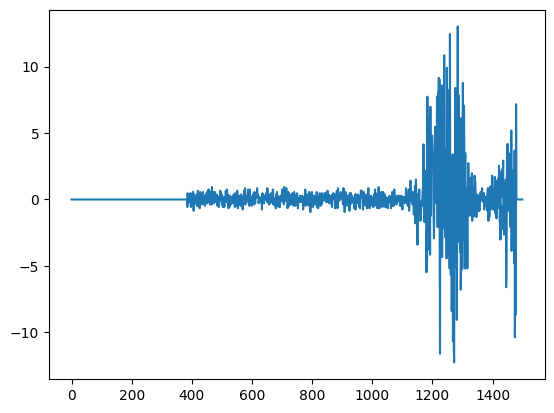

In [23]:
plt.plot(range(1500), validation[71]) # what the fuck is this

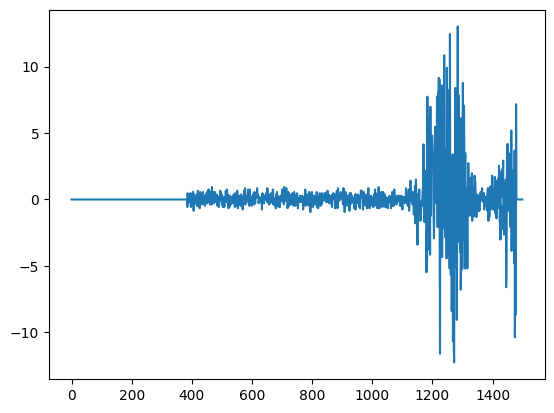

In [45]:
plt.plot(range(1500), validation[((validation_target==3) & (preds==2))][7]) # what the fuck is this

Text(0.5, 1.0, 'true: trans, pred: trans')

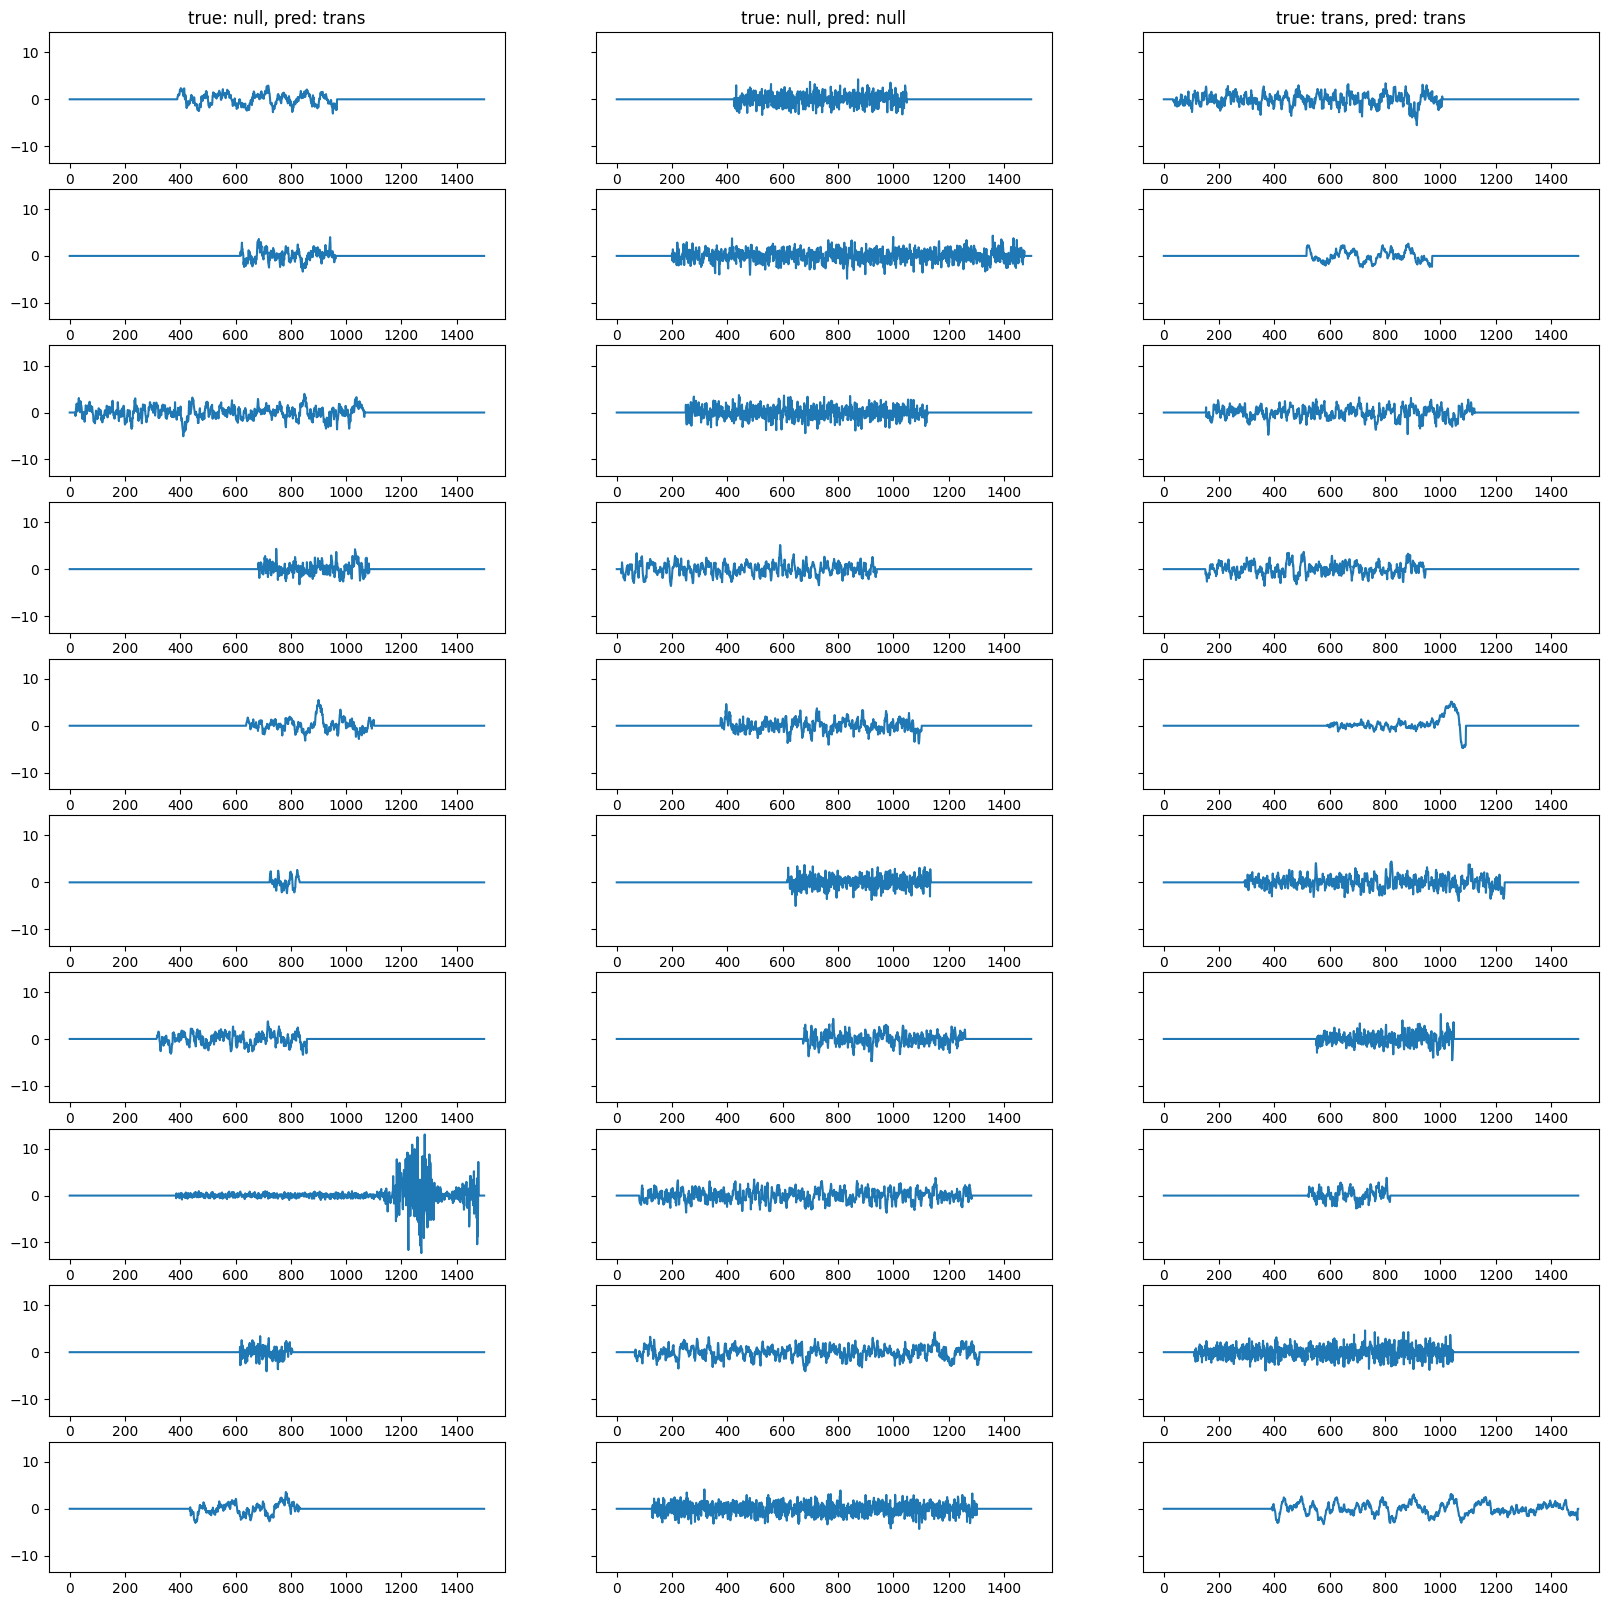

In [40]:
fig, ax = plt.subplots(10, 3, sharey=True, figsize=(20,20))
error_0to1 = validation[((validation_target==3) & (preds==2))]
for i in range(10):
    ax[i,0].plot(range(1500),error_0to1[i])
ax[0,0].set_title("true: null, pred: trans")

true_0 = validation[((validation_target==3) & (preds==3))]
for i in range(10):
    ax[i,1].plot(range(1500),true_0[i])
ax[0,1].set_title("true: null, pred: null")


true_1 = validation[((validation_target==2) & (preds==2))]
for i in range(10):
    ax[i,2].plot(range(1500),true_1[i])
ax[0,2].set_title("true: trans, pred: trans")

    